In [1]:
import numpy as np

In [2]:
def AND(x,y):
    return 0 if np.sum(np.array([x,y]) * np.array([0.5, 0.5])) - 0.7 <= 0 else 1 

In [3]:
AND(0,0), AND(0,1), AND(1,0), AND(1,1)

(0, 0, 0, 1)

In [8]:
x = np.array([3,4])
y = np.array([0.5, 0.5])
np.transpose(x) @ y

3.5

In [9]:
"""Only the linear combination can be expressed by the perceptron but fo the non-linear cases, the perceptron fails here!!!!"""

'Only the linear combination can be expressed by the perceptron but fo the non-linear cases, the perceptron fails here!!!!'

In [10]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [11]:
x = np.arange(-10, 10, 0.1)
y = sigmoid(x)


In [12]:
import matplotlib.pyplot as plt

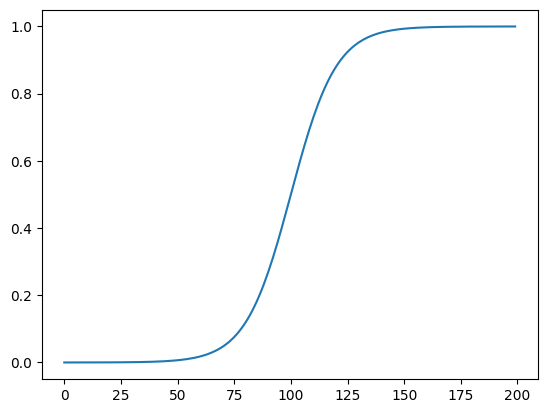

In [13]:
plt.plot(y)
plt.show()

In [14]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network

In [23]:
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = a3
    return y

In [24]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y) # sigmoid, identity_function함수는 앞서 정의됨

[0.31682708 0.69627909]


In [25]:
pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 16.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
from nltk.corpus import wordnet

In [3]:
wordnet.synsets('car')

LookupError: 
**********************************************************************
  Resource [93mwordnet[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('wordnet')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/wordnet[0m

  Searched in:
    - '/home/nirmal/nltk_data'
    - '/home/nirmal/miniconda3/envs/slr/nltk_data'
    - '/home/nirmal/miniconda3/envs/slr/share/nltk_data'
    - '/home/nirmal/miniconda3/envs/slr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [4]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/nirmal/nltk_data...


True

In [5]:
nltk.download('omw-1.4')  # Optional, enhances WordNet

[nltk_data] Downloading package omw-1.4 to /home/nirmal/nltk_data...


True

In [7]:
from nltk.corpus import wordnet
synsets = wordnet.synsets('car')

In [8]:
synsets

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [9]:
wordnet.synset('car.n.01').definition()

'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

In [13]:
wordnet.synset('car').path_similarity(wordnet.synset('dog'))

ValueError: not enough values to unpack (expected 3, got 1)

In [1]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [1]:
from graphviz import Digraph

# Create a directed graph
dot = Digraph(format='png', engine='dot')
dot.attr(rankdir='LR', size='10')

# Add top-level modules
dot.node('RecognitionNetwork', 'RecognitionNetwork', shape='box', style='filled', fillcolor='lightblue')
dot.node('S3D_backbone', 'S3D_backbone', shape='box', style='filled', fillcolor='lightgreen')
dot.node('VisualHead', 'VisualHead', shape='box', style='filled', fillcolor='lightyellow')
dot.node('CTCLoss', 'CTCLoss', shape='box', style='filled', fillcolor='lightcoral')

# Add submodules in S3D_backbone
dot.node('SepConv3d', 'SepConv3d', shape='ellipse')
dot.node('MaxPool3d', 'MaxPool3d', shape='ellipse')
dot.node('Mixed_Layers', 'Mixed Layers\n(Mixed_3b, Mixed_4b, etc.)', shape='ellipse')

# Add submodules in VisualHead
dot.node('fc1', 'fc1 (Fully Connected)', shape='ellipse')
dot.node('PositionalEncoding', 'PositionalEncoding', shape='ellipse')
dot.node('PositionwiseFeedForward', 'PositionwiseFeedForward', shape='ellipse')
dot.node('gloss_output_layer', 'gloss_output_layer', shape='ellipse')

# Add connections for RecognitionNetwork
dot.edge('RecognitionNetwork', 'S3D_backbone')
dot.edge('RecognitionNetwork', 'VisualHead')
dot.edge('RecognitionNetwork', 'CTCLoss')

# Add connections for S3D_backbone
dot.edge('S3D_backbone', 'SepConv3d')
dot.edge('S3D_backbone', 'MaxPool3d')
dot.edge('S3D_backbone', 'Mixed_Layers')

# Add connections for VisualHead
dot.edge('VisualHead', 'fc1')
dot.edge('VisualHead', 'PositionalEncoding')
dot.edge('VisualHead', 'PositionwiseFeedForward')
dot.edge('VisualHead', 'gloss_output_layer')

# Render the graph and display the image
output_path = 'tr'
dot.render(output_path, format='png', cleanup=True)

output_path + '.png'


'tr.png'

In [4]:
from graphviz import Digraph

# Initialize the graph
dot = Digraph(format='png', engine='dot')
dot.attr(rankdir='TB', size='10')  # TB: Top-to-bottom hierarchy

# Root node
dot.node('SignLanguageModel', 'SignLanguageModel', shape='box', style='filled', fillcolor='lightblue')

# Recognition Network
dot.node('RecognitionNetwork', 'RecognitionNetwork', shape='box', style='filled', fillcolor='lightgreen')
dot.edge('SignLanguageModel', 'RecognitionNetwork')

# S3D Backbone
dot.node('S3D_backbone', 'S3D_backbone\n(Input: Video, Output: Features)', shape='box', style='filled', fillcolor='lightyellow')
dot.edge('RecognitionNetwork', 'S3D_backbone')

# Base (Sequential)
dot.node('base', 'base (Sequential)', shape='box', style='dashed')
dot.edge('S3D_backbone', 'base')

# Individual layers in Sequential
dot.node('SepConv3d_1', 'SepConv3d\nKernel: (1,7,7)\nStride: (1,2,2)\nPadding: (0,3,3)', shape='ellipse', style='filled', fillcolor='lightgrey')
dot.node('MaxPool3d_1', 'MaxPool3d\nKernel: (1,3,3)\nStride: (1,2,2)\nPadding: (0,1,1)', shape='ellipse', style='filled', fillcolor='lightgrey')
dot.node('BasicConv3d', 'BasicConv3d\nKernel: (1,1,1)\nStride: (1,1,1)', shape='ellipse', style='filled', fillcolor='lightgrey')
dot.node('SepConv3d_2', 'SepConv3d\nKernel: (1,3,3)\nStride: (1,1,1)\nPadding: (0,1,1)', shape='ellipse', style='filled', fillcolor='lightgrey')
dot.node('MaxPool3d_2', 'MaxPool3d\nKernel: (1,3,3)\nStride: (1,2,2)\nPadding: (0,1,1)', shape='ellipse', style='filled', fillcolor='lightgrey')

# Mixed layers
dot.node('Mixed_3b', 'Mixed_3b\n(Multi-branch layer)', shape='ellipse', style='filled', fillcolor='lightgreen')
dot.node('Mixed_3c', 'Mixed_3c\n(Multi-branch layer)', shape='ellipse', style='filled', fillcolor='lightgreen')
dot.node('Mixed_4b', 'Mixed_4b\n(Multi-branch layer)', shape='ellipse', style='filled', fillcolor='lightgreen')
dot.node('Mixed_4c', 'Mixed_4c\n(Multi-branch layer)', shape='ellipse', style='filled', fillcolor='lightgreen')
dot.node('Mixed_4d', 'Mixed_4d\n(Multi-branch layer)', shape='ellipse', style='filled', fillcolor='lightgreen')
dot.node('Mixed_4e', 'Mixed_4e\n(Multi-branch layer)', shape='ellipse', style='filled', fillcolor='lightgreen')
dot.node('Mixed_4f', 'Mixed_4f\n(Multi-branch layer)', shape='ellipse', style='filled', fillcolor='lightgreen')

# Connecting layers inside base (Sequential)
dot.edge('base', 'SepConv3d_1')
dot.edge('SepConv3d_1', 'MaxPool3d_1')
dot.edge('MaxPool3d_1', 'BasicConv3d')
dot.edge('BasicConv3d', 'SepConv3d_2')
dot.edge('SepConv3d_2', 'MaxPool3d_2')
dot.edge('MaxPool3d_2', 'Mixed_3b')
dot.edge('Mixed_3b', 'Mixed_3c')
dot.edge('Mixed_3c', 'Mixed_4b')
dot.edge('Mixed_4b', 'Mixed_4c')
dot.edge('Mixed_4c', 'Mixed_4d')
dot.edge('Mixed_4d', 'Mixed_4e')
dot.edge('Mixed_4e', 'Mixed_4f')

# Save and render the graph
output_path = 'new'
dot.render(output_path, format='png', cleanup=True)

print(f"Graph generated and saved to {output_path}.png")


Graph generated and saved to new.png


In [5]:
pip install matplotlib_venn

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 5.8 MB/s eta 0:00:0000:0100:01
  Created wheel for matplotlib_venn: filename=matplotlib_venn-1.1.1-py3-none-any.whl size=45289 sha256=0aeaf7a534cd66795867e02222db75c979561806da7beec68b1c8e4ed0cfe4db
  Stored in directory: /home/nirmal/.cache/pip/wheels/3c/b6/e2/5fadaf4aa63fac5b079d4f633e9d96b29a67ee4fae816806f3
Successfully built matplotlib_venn
Note: you may need to restart the kernel to use updated packages.


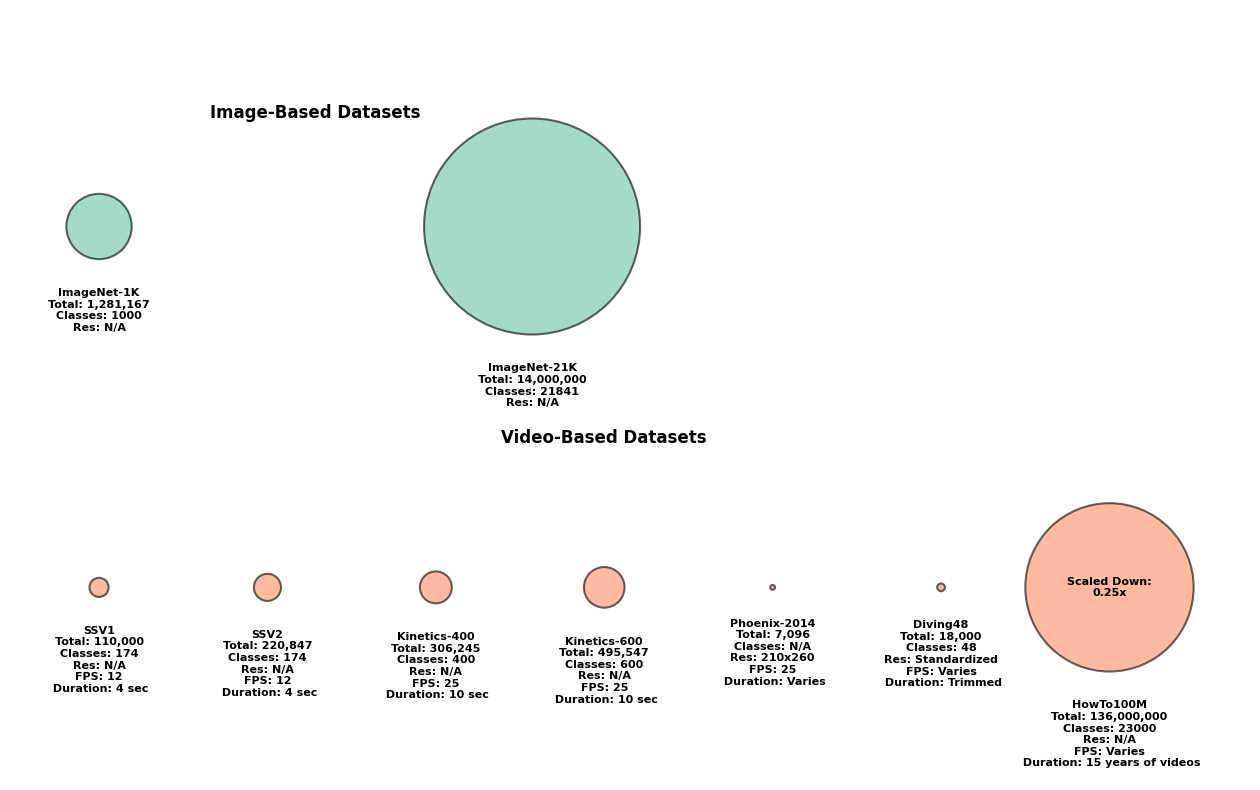

'Bubble_Chart.png'

In [34]:
# Final Adjustments for Bubble Chart with Proper Layout and Spacing

import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np

# Dataset Information
image_datasets = {
    "ImageNet-1K": {"total": 1281167, "classes": 1000},
    "ImageNet-21K": {"total": 14000000, "classes": 21841},
}

video_datasets = {
    "SSV1": {"total": 110000, "classes": 174, "fps": 12, "duration": "4 sec"},
    "SSV2": {"total": 220847, "classes": 174, "fps": 12, "duration": "4 sec"},
    "Kinetics-400": {"total": 306245, "classes": 400, "fps": 25, "duration": "10 sec"},
    "Kinetics-600": {"total": 495547, "classes": 600, "fps": 25, "duration": "10 sec"},
    "Phoenix-2014": {"total": 7096, "classes": "N/A", "fps": 25, "duration": "Varies", "Res": "210x260"},
    "Diving48": {"total": 18000, "classes": 48, "fps": "Varies", "duration": "Trimmed", "Res": "Standardized"},
    "HowTo100M": {"total": 136000000, "classes": 23000, "fps": "Varies", "duration": "15 years of videos", "Res": "N/A"},
}

# Function to draw a clean bubble with description below
def draw_bubble(ax, x, y, dataset, details, radius, color):
    # Scale down large bubbles explicitly
    scaling_factor = 1
    if dataset == "HowTo100M":
        scaling_factor = 0.25  # Scale down factor for large bubble
        radius *= scaling_factor

    # Draw bubble
    circle = Circle((x, y), radius, edgecolor="black", lw=1.5, facecolor=color, alpha=0.6)
    ax.add_patch(circle)

    # Add scaling info inside the bubble for large datasets
    if dataset == "HowTo100M":
        ax.text(x, y, f"Scaled Down:\n{scaling_factor}x", fontsize=8, ha="center", va="center", weight="bold", color="black")

    # Add dataset description below
    label = f"{dataset}\nTotal: {details['total']:,}\nClasses: {details['classes']}\nRes: {details.get('Res', 'N/A')}"
    if "fps" in details:
        label += f"\nFPS: {details['fps']}\n Duration: {details['duration']}"

    ax.text(x, y - radius - 0.4, label, fontsize=8, ha="center", va="top", weight="bold")

# Initialize Plot
fig, ax = plt.subplots(figsize=(16, 10))

# Plot Image-Based Datasets (Top Row)
x_positions = np.linspace(2, 8, len(image_datasets))  # Spread across the top
y_image = 8
for i, (dataset, details) in enumerate(image_datasets.items()):
    radius = np.sqrt(details["total"]) * 0.0004  # Proportional scaling
    draw_bubble(ax, x_positions[i], y_image, dataset, details, radius, color="#66c2a5")

# Plot Video-Based Datasets (Bottom Row)
x_positions = np.linspace(2, 16, len(video_datasets))  # Full-width spacing for videos
y_video = 3
for i, (dataset, details) in enumerate(video_datasets.items()):
    radius = np.sqrt(details["total"]) * 0.0004  # Proportional scaling
    draw_bubble(ax, x_positions[i], y_video, dataset, details, radius, color="#fc8d62")

# Add Labels for Sections
ax.text(5, 9.5, "Image-Based Datasets", fontsize=12, weight="bold", ha="center")
ax.text(9, 5, "Video-Based Datasets", fontsize=12, weight="bold", ha="center")

# Adjust Layout
ax.axis("equal")  # Ensure circles look like circles
ax.axis("off")    # Hide axes for a clean look

# Save and Show
output_file = "Bubble_Chart.png"
plt.savefig(output_file, dpi=300, bbox_inches="tight")
plt.show()

output_file

In [1]:
import numpy as np

In [2]:
np.arange(6)

array([0, 1, 2, 3, 4, 5])

In [3]:
x = np.arange(10)

In [4]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
x[2:-2]

array([2, 3, 4, 5, 6, 7])

In [6]:
5//2

2

In [9]:
402%2

0

In [19]:
frame_idx = [5,6,7,8,9]
valid_len = 5

In [20]:
assert len(frame_idx) == valid_len, (frame_idx, valid_len)

In [21]:
np.random.randint(25,50)

41

In [28]:
sorted(np.random.permutation(np.arange(10))[:6])

[1, 2, 4, 6, 8, 9]

In [29]:
import pathlib

pathlib.Path('Nirmal')

PosixPath('Nirmal')

In [1]:
import sys
import pathlib

In [2]:
sys.path

['/home/nirmal/miniconda3/envs/slr/lib/python310.zip',
 '/home/nirmal/miniconda3/envs/slr/lib/python3.10',
 '/home/nirmal/miniconda3/envs/slr/lib/python3.10/lib-dynload',
 '',
 '/home/nirmal/miniconda3/envs/slr/lib/python3.10/site-packages']

In [5]:
import torch
import time
import torch.backends.cudnn as cudnn
# Fixed input dimensions
input_tensor = torch.randn(64, 3, 224, 224).cuda()

# Enable benchmarking
cudnn.benchmark = True

# Measure execution time
start = time.time()
for _ in range(100):
    _ = torch.nn.functional.conv2d(input_tensor, torch.randn(64, 3, 3, 3).cuda())
end = time.time()

print(f"Time with cudnn.benchmark=True: {end - start:.4f} seconds")

Time with cudnn.benchmark=True: 0.2590 seconds


In [7]:
import torch
import time
import torch.backends.cudnn as cudnn

# Variable input dimensions (mimics dynamic shapes in a dataset)
input_shapes = [(64, 3, 224, 224), (64, 3, 256, 256), (64, 3, 192, 192)]
conv_filter = torch.randn(64, 3, 3, 3).cuda()

# Disable benchmarking
cudnn.benchmark = True

# Measure execution time
start = time.time()
for shape in input_shapes:
    input_tensor = torch.randn(*shape).cuda()
    for _ in range(30):  # Repeat to simulate multiple batches
        _ = torch.nn.functional.conv2d(input_tensor, conv_filter)
end = time.time()

print(f"Time with cudnn.benchmark=False: {end - start:.4f} seconds")


Time with cudnn.benchmark=False: 0.2128 seconds


In [24]:
import torch
import time
import torch.backends.cudnn as cudnn

# Fixed input dimensions
input_tensor = torch.randn(64, 3, 224, 224).cuda()

# Enable benchmarking
cudnn.benchmark = True

# Measure execution time
start = time.time()
for _ in range(100):  # Repeat for multiple iterations
    _ = torch.nn.functional.conv2d(input_tensor, torch.randn(64, 3, 3, 3).cuda())
end = time.time()

print(f"Fixed Input - Time with cudnn.benchmark=True: {end - start:.4f} seconds")

Fixed Input - Time with cudnn.benchmark=True: 0.3307 seconds


In [29]:
import torch
import time
import torch.backends.cudnn as cudnn

# Variable input dimensions
input_shapes = [(64, 3, 224, 224), (64, 3, 256, 256), (64, 3, 192, 192)]
conv_filter = torch.randn(64, 3, 3, 3).cuda()

# Enable benchmarking
cudnn.benchmark = True

# Measure execution time
start = time.time()
for shape in input_shapes:
    for _ in range(30):  # Repeat for multiple iterations
        input_tensor = torch.randn(*shape).cuda()
        _ = torch.nn.functional.conv2d(input_tensor, conv_filter)
end = time.time()

print(f"Variable Input - Time with cudnn.benchmark=True: {end - start:.4f} seconds")


Variable Input - Time with cudnn.benchmark=True: 3.5311 seconds


In [30]:
import torch
import time
import torch.backends.cudnn as cudnn

# Variable input dimensions
input_shapes = [(64, 3, 224, 224), (64, 3, 256, 256), (64, 3, 192, 192)]
conv_filter = torch.randn(64, 3, 3, 3).cuda()

# Disable benchmarking
cudnn.benchmark = False

# Measure execution time
start = time.time()
for shape in input_shapes:
    for _ in range(30):  # Repeat for multiple iterations
        input_tensor = torch.randn(*shape).cuda()
        _ = torch.nn.functional.conv2d(input_tensor, conv_filter)
end = time.time()

print(f"Variable Input - Time with cudnn.benchmark=False: {end - start:.4f} seconds")


Variable Input - Time with cudnn.benchmark=False: 3.6595 seconds


: 

In [2]:
import torch
x = torch.randn(128, 196, 384)

In [39]:
extra = 0
new_size=14

In [40]:
extra_tokens = x[:,:extra]
extra_tokens.shape

torch.Size([128, 0, 384])

In [41]:
pos_tokens = x[:, extra:]
pos_tokens.shape

torch.Size([128, 196, 384])

In [42]:
embedding_size = pos_tokens.shape[-1]
embedding_size

384

In [43]:
pos_tokens = pos_tokens.reshape(-1, 14, 14, embedding_size).permute(0, 3, 1, 2)
pos_tokens.shape

torch.Size([128, 384, 14, 14])

In [44]:
pos_tokens = torch.nn.functional.interpolate(
        pos_tokens, size=new_size, mode="bicubic", align_corners=False,
    )
# pos_tokens = pos_tokens.permute(0, 2, 3, 1).flatten(1, 2)
pos_tokens.shape

torch.Size([128, 384, 14, 14])

In [45]:
pos_tokens = pos_tokens.permute(0, 2, 3, 1).flatten(1, 2)
pos_tokens.shape

torch.Size([128, 196, 384])

In [46]:
new_pos_embed = torch.cat((extra_tokens, pos_tokens), dim=1)

In [47]:
new_pos_embed.shape

torch.Size([128, 196, 384])

In [48]:
5%2

1

In [49]:
int(9.9)

9

In [52]:
np.random.randint(15, 31)

25

In [57]:
import numpy as np
sorted(np.random.permutation(np.arange(30))[:20])

[0, 1, 3, 4, 5, 8, 9, 11, 12, 16, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28]

In [59]:
copied_index=np.random.randint(0,30,35-30)
copied_index

array([14, 10, 20, 23, 21])

In [60]:
sorted(np.concatenate([np.arange(30), copied_index]))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 10,
 11,
 12,
 13,
 14,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 20,
 21,
 21,
 22,
 23,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [1]:
16 // 4 // 2

2

In [53]:
# Kaprekar's Constant
counter = 0
def subtractor(a):
    assert len(set(str(a))) in range(1,5), f"Must have 4 non-repeating digits"
    
    global counter
    elements = f"{a % 10}{a // 10 % 10}{a // 100 % 10}{a // 1000}"
    op1 = int("".join(sorted(str(elements), reverse=True)))
    op2 = int("".join(sorted(str(elements))))
    out = op1 - op2
    counter += 1
    if out == 6174:
        print(f"{out} in {counter} itrs")
        counter = 0
    else:
        assert len(set(str(out))) in range(1,5), \
            f"Difference: {out} in {counter} itrs, has repeating digits"
        subtractor(out)

In [43]:
import torch
r_num = torch.randint(1000, 10000, (10,)).tolist()
r_num

[7720, 6171, 3461, 8801, 6653, 2864, 1585, 3292, 5532, 1290]

In [62]:
loss = 3
loss.shape

AttributeError: 'int' object has no attribute 'shape'

In [61]:
import torch
r_num = torch.randint(1000, 10000, (10,)).tolist()
print(r_num)
for num in r_num:
    print(f"Checking {num} for Kaprekar's Constant")
    subtractor(num)

[1832, 5585, 1378, 8691, 2359, 7541, 2940, 6717, 5467, 7881]
Checking 1832 for Kaprekar's Constant
6174 in 3 itrs
Checking 5585 for Kaprekar's Constant
6174 in 6 itrs
Checking 1378 for Kaprekar's Constant
6174 in 3 itrs
Checking 8691 for Kaprekar's Constant
6174 in 6 itrs
Checking 2359 for Kaprekar's Constant
6174 in 5 itrs
Checking 7541 for Kaprekar's Constant
6174 in 7 itrs
Checking 2940 for Kaprekar's Constant
6174 in 3 itrs
Checking 6717 for Kaprekar's Constant
6174 in 7 itrs
Checking 5467 for Kaprekar's Constant
6174 in 3 itrs
Checking 7881 for Kaprekar's Constant
6174 in 3 itrs


In [56]:
subtractor(6714)

6174 in 1 itrs


In [14]:
import torch.nn as nn
import torch
criterion = nn.CTCLoss(blank=0, reduction='none', zero_infinity=True)

In [15]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.path.dirname('trials.ipynb'), os.path.pardir)))
from datasets.tokenizer import GlossTokenizer_S2G

tokenizer_cfg = {
    'gloss2id_file': '/nas/Dataset/Phoenix/gloss2ids.pkl'
}

gloss_tokenizer = GlossTokenizer_S2G(tokenizer_cfg)

In [16]:
gloss_tokenizer.silence_id

0

In [ ]:
log_probs = nn.functional.log_softmax(torch.randn(10, 5, 4))

log_probs.shape

/tmp/ipykernel_2188179/3140027879.py:1: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  log_probs = nn.functional.log_softmax(torch.randn(10, 5, 4))


torch.Size([10, 5, 4])

In [23]:
T = 50 # Input sequence lenght
C = 20 # Number of classes
N = 16 # Batch Size
S = 30 # Target sequence lenght of longest target in batch (paddin length)
S_min = 10 # Minimum target length, for example

# Initialize random batch of input vectors, for *size = (T, N, C)
input = torch.randn(T,N,C).log_softmax(2).detach().requires_grad_()

# Initialize random batch of targets (0 = blank, 1:C = classes)
target = torch.randint(low=1, high=C, size=(N,S), dtype=torch.long)

input_lengths = torch.full(size=(N,), fill_value=T, dtype=torch.long)
target_lengths = torch.randint(low=S_min, high=S, size=(N,), dtype=torch.long)
loss = criterion(input, target, input_lengths, target_lengths)
loss.item()



RuntimeError: a Tensor with 16 elements cannot be converted to Scalar

In [24]:
gloss_tokenizer

In [31]:
for idx, gloss in enumerate(gloss_tokenizer.gloss2id):
    print(idx, gloss)

0 <s>
1 <pad>
2 </s>
3 <unk>
4 <mask>
5 REGEN
6 __OFF__
7 __ON__
8 IX
9 MORGEN
10 WOLKE
11 SONNE
12 GRAD
13 __EMOTION__
14 WEHEN
15 REGION
16 loc-REGION
17 __PU__
18 SCHNEE
19 NACHT
20 GEWITTER
21 KOENNEN
22 MEHR
23 AUCH
24 cl-KOMMEN
25 BISSCHEN
26 HEUTE
27 SCHAUER
28 KOMMEN
29 BIS
30 WETTER
31 SUED
32 NORD
33 WIND
34 DANN
35 ZWANZIG
36 __LEFTHAND__
37 NEBEL
38 OST
39 ABEND
40 MOEGLICH
41 FREUNDLICH
42 JETZT
43 BERG
44 STURM
45 TEIL
46 MAESSIG
47 WECHSELHAFT
48 ABER
49 TAG
50 WEST
51 FLUSS
52 TIEF
53 WIE-AUSSEHEN
54 MINUS
55 SCHWACH
56 MITTE
57 NORDRAUM
58 BLEIBEN
59 SONNTAG
60 KUEHL
61 FREITAG
62 KLAR
63 VIEL
64 SAMSTAG
65 TROCKEN
66 HOCH
67 STARK
68 loc-NORD
69 DONNERSTAG
70 BESONDERS
71 SONST
72 MEISTENS
73 TEMPERATUR
74 KALT
75 IN-KOMMEND
76 UND
77 MITTWOCH
78 SCHNEIEN
79 MONTAG
80 WARM
81 NUR
82 REGEN-PLUSPLUS
83 LAND
84 GUT
85 FUENF
86 DEUTSCH
87 NORDWESTRAUM
88 DIENSTAG
89 MITTAG
90 loc-NORDWEST
91 SCHOEN
92 ALPEN
93 FROST
94 MILD
95 DREI
96 KUESTE
97 IM-VERLAUF
98 HIMMEL
99 VER

In [28]:
gloss_tokenizer.tokenizer_cfg

{'gloss2id_file': '/nas/Dataset/Phoenix/gloss2ids.pkl'}

In [ ]:
gloss_tokenizer.

In [45]:
from datasets.dataset import Phoenix2014Video, build_dataset
from run import get_args
from utils import collate_fn
from functools import partial

In [46]:
import sys

# Option 1: Completely reset sys.argv (if you don't need any command-line arguments)
sys.argv = [sys.argv[0]]

# Option 2: Alternatively, filter out the unwanted arguments (e.g., those starting with "--f=")
sys.argv = [arg for arg in sys.argv if not arg.startswith("--f=")]

# Now import and use get_args()
from run import get_args
args, _ = get_args()

In [47]:
val_dataset = build_dataset(modal="video",
                            gloss_tokenizer=gloss_tokenizer,
                            is_train=False,
                            is_test=False,
                            args=args
                            )

Use Dataset: phoenix-2014


In [48]:
len(val_dataset)

540

In [49]:
collate = partial(collate_fn, gloss_tokenizer=gloss_tokenizer)

In [50]:
import torch.utils
from torch.utils.data import  DataLoader
val_sampler = torch.utils.data.SequentialSampler(val_dataset)
val_dataloader = DataLoader(
    val_dataset,
    sampler=val_sampler,
    batch_size=1,
    num_workers=12,
    pin_memory=True,
    drop_last=False,
    collate_fn=collate,
    prefetch_factor=2,
    persistent_workers=False
)

In [52]:
val_dataloader

In [ ]:
for idx, batch in enumerate(val_dataloader):
    if idx == torch.randint(0, len(val_dataloader), (1,)).item():
        frames, frames_len, targets, targets_len, name = batch  # Adjust the number of variables as needed.
        print(idx, frames.shape, frames_len, targets, targets_len, name)
        break

[DEBUG] FROM VIDEO TRANSFORMS: Received Clip Shape: (210, 210, 3), Length: 128
[DEBUG] VOLUME_TRANSFORMS:TENSOR CLIP torch.Size([3, 128, 224, 224])
[DEBUG] FROM VIDEO TRANSFORMS: Received Clip Shape: (210, 210, 3), Length: 128
[DEBUG] VOLUME_TRANSFORMS:TENSOR CLIP torch.Size([3, 128, 224, 224])
[DEBUG] FROM VIDEO TRANSFORMS: Received Clip Shape: (210, 210, 3), Length: 128
[DEBUG] VOLUME_TRANSFORMS:TENSOR CLIP torch.Size([3, 128, 224, 224])
[DEBUG] FROM VIDEO TRANSFORMS: Received Clip Shape: (210, 210, 3), Length: 128
[DEBUG] VOLUME_TRANSFORMS:TENSOR CLIP torch.Size([3, 128, 224, 224])
[DEBUG] FROM VIDEO TRANSFORMS: Received Clip Shape: (210, 210, 3), Length: 128
[DEBUG] VOLUME_TRANSFORMS:TENSOR CLIP torch.Size([3, 128, 224, 224])
[DEBUG] FROM VIDEO TRANSFORMS: Received Clip Shape: (210, 210, 3), Length: 128
[DEBUG] VOLUME_TRANSFORMS:TENSOR CLIP torch.Size([3, 128, 224, 224])
[DEBUG] FROM VIDEO TRANSFORMS: Received Clip Shape: (210, 210, 3), Length: 128
[DEBUG] VOLUME_TRANSFORMS:TENSOR 

In [92]:
frames = frames.permute(0, 2, 3, 4, 1)

In [93]:
frames.shape

torch.Size([1, 128, 224, 224, 3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8096584..2.5528543].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8610327..2.6051416].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8952821..2.5005665].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0151556..2.5877128].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8610327..2.5702832].


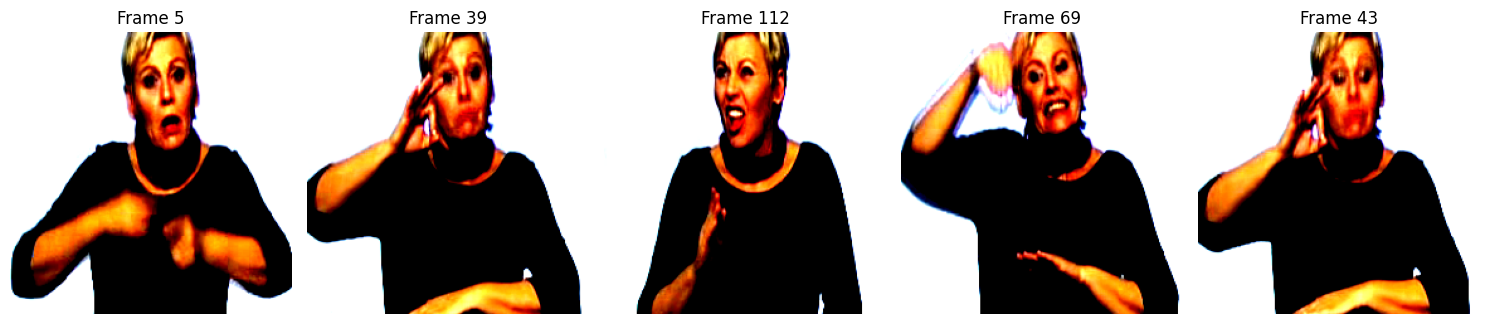

In [94]:
import numpy as np
# Randomly select 5 frame indices from the time dimension
frame_indices = np.random.choice(frames.shape[1], 5, replace=False)

fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for ax, idx in zip(axes, frame_indices):
    # Convert the tensor to a NumPy array (shape: (224, 224, 3))
    frame_np = frames[0, idx].cpu().numpy()
    ax.imshow(frame_np)
    ax.set_title(f"Frame {idx}")
    ax.axis("off")
plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8781574..2.5702832].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8781574..2.5528543].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8610327..2.5005665].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8267832..2.465708].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8952821..2.5702832].


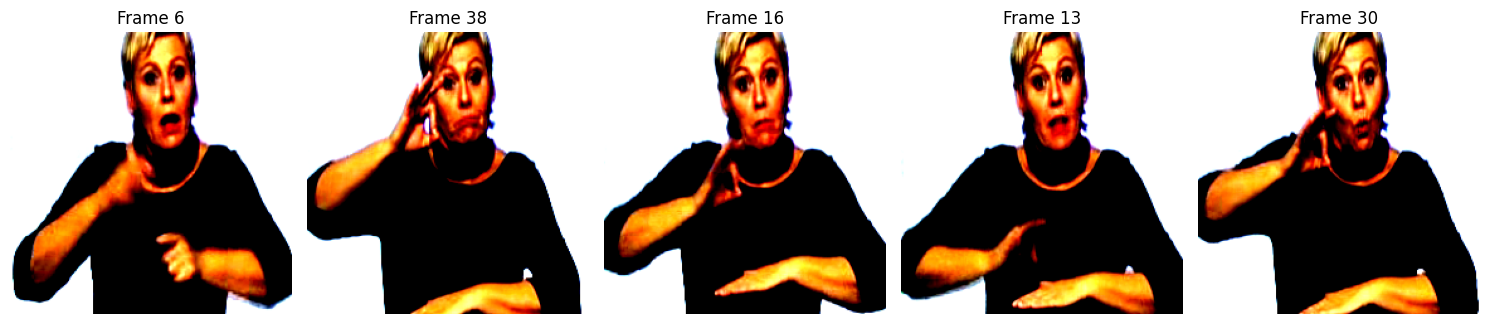

Targets: [['IM-VERLAUF', 'IM-VERLAUF', 'TEMPERATUR', 'REGION', 'SUED', 'MEHR', 'FREUNDLICH', 'IX', 'NORD', 'NICHT', '__OFF__']]


In [95]:
# Randomly select 5 frame indices from the time dimension
frame_indices = np.random.choice(frames.shape[1], 5, replace=False)

fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for ax, idx in zip(axes, frame_indices):
    # Convert the tensor to a NumPy array (shape: (224, 224, 3))
    frame_np = frames[0, idx].cpu().numpy()
    ax.imshow(frame_np)
    ax.set_title(f"Frame {idx}")
    ax.axis("off")
plt.tight_layout()
plt.show()
print(f"Targets: {gloss_tokenizer.convert_ids_to_tokens(targets.tolist())}")

In [96]:
from model import build_model

In [97]:
args

Namespace(task='s2g', batch_size=1, epochs=100, update_freq=1, save_ckpt_freq=100, pretrained=True, patch_size=[16, 16], in_chans=3, embed_dim=192, depths=12, num_heads=6, tubelet_size=2, drop_rate=0.1, attn_drop_rate=0.1, head_drop_rate=0.1, drop_path_rate=0.1, disable_eval_during_training=False, model_ema=False, model_ema_decay=0.9999, model_ema_force_cpu=False, opt='adamw', opt_eps=1e-08, opt_betas=[0.9, 0.999], clip_grad=None, momentum=0.9, weight_decay=0.05, weight_decay_start=None, weight_decay_end=None, lr=0.001, min_lr=1e-06, warmup_lr=1e-06, warmup_epochs=5, T_0=50, T_mul=1, lr_gamma=0.5, aug_size=[210, 210], t_min=0.5, t_max=1.5, color_jitter=0.4, aa='rand-m9-mstd0.5', train_interpolation='bicubic', reprob=0.0, remode='pixel', recount=1, modal='video', video_size=[224, 224], metadata_path='/nas/Dataset/Phoenix/', gloss_to_id_path='/nas/Dataset/Phoenix/gloss2ids.pkl', video_path='/nas/Dataset/Phoenix/phoenix-2014-videos.zip', keypoint_path='', split=',', n_classes=1235, num_fr

In [98]:
model = build_model(args)

In [99]:
model

RGBModel(
  (video_backbone): VisionTransformer(
    (patch_embed): PatchEmbed(
      (proj): Conv3d(3, 192, kernel_size=(2, 16, 16), stride=(2, 16, 16))
    )
    (pos_drop): Dropout(p=0.1, inplace=False)
    (blocks): ModuleList(
      (0): Block(
        (norm1): LayerNorm((192,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=192, out_features=576, bias=False)
          (attn_drop): Dropout(p=0.1, inplace=False)
          (proj): Linear(in_features=192, out_features=192, bias=True)
          (proj_drop): Dropout(p=0.1, inplace=False)
        )
        (drop_path): Identity()
        (norm2): LayerNorm((192,), eps=1e-06, elementwise_affine=True)
        (mlp): Mlp(
          (fc1): Linear(in_features=192, out_features=768, bias=True)
          (act): GELU(approximate='none')
          (fc2): Linear(in_features=768, out_features=192, bias=True)
          (drop): Dropout(p=0.1, inplace=False)
        )
      )
      (1): Block(
     

In [100]:
frames = frames.permute(0, 4, 1, 2, 3)
frames_len

tensor([128])

In [101]:
output = model(frames, frames_len)

In [102]:
output

{'gloss_logits': tensor([[[-0.1242, -0.8990,  0.8738,  ...,  0.8354,  0.4045, -0.2850],
          [-0.0436, -0.9513,  0.6528,  ..., -0.1711,  1.0991, -0.2070],
          [ 0.0302, -1.5377,  0.9323,  ..., -1.4339,  0.7496, -0.0432],
          ...,
          [ 0.0623,  0.2408, -0.0336,  ..., -0.2316, -0.1562,  1.0563],
          [-0.1485, -0.1260, -0.2212,  ..., -0.5839,  0.9575,  0.5124],
          [ 0.0845,  0.1928,  0.5865,  ..., -0.1757,  0.3753,  0.4155]]],
        grad_fn=<ViewBackward0>),
 'gloss_probabilities_log': tensor([[[-7.4133, -8.1881, -6.4154,  ..., -6.4538, -6.8846, -7.5741],
          [-7.3320, -8.2398, -6.6357,  ..., -7.4596, -6.1893, -7.4954],
          [-7.2376, -8.8056, -6.3355,  ..., -8.7017, -6.5183, -7.3111],
          ...,
          [-7.2645, -7.0859, -7.3604,  ..., -7.5583, -7.4830, -6.2705],
          [-7.4347, -7.4122, -7.5075,  ..., -7.8701, -6.3287, -6.7738],
          [-7.2201, -7.1118, -6.7181,  ..., -7.4803, -6.9293, -6.8891]]],
        grad_fn=<LogSoftm

In [103]:
rgb_out = model.video_backbone(frames, frames_len)


In [104]:
rgb_out

{'sgn': tensor([[[-0.5493, -0.5770,  0.0524,  ...,  0.3440, -0.7242,  0.7856],
          [-0.1650, -0.3749, -0.1623,  ...,  0.6030, -0.7190,  0.5341],
          [-0.3518, -0.6773, -0.3771,  ...,  0.6930, -0.5537,  0.5792],
          ...,
          [-0.1903, -0.7447,  0.7936,  ...,  0.3272,  0.4772,  0.4821],
          [ 0.0333, -0.6052,  0.6167,  ...,  0.6771,  0.2926,  0.5286],
          [-0.2607, -0.7510,  0.4058,  ...,  0.7763,  0.3389,  0.3871]]],
        grad_fn=<MeanBackward1>),
 'sgn_mask': [tensor([[[True, True, True, True, True, True, True, True, True, True, True,
            True, True, True, True, True, True, True, True, True, True, True,
            True, True, True, True, True, True, True, True, True, True, True,
            True, True, True, True, True, True, True, True, True, True, True,
            True, True, True, True, True, True, True, True, True, True, True,
            True, True, True, True, True, True, True, True, True]]])],
 'valid_len_out': [tensor([64])]}

In [111]:
rgb_out['sgn'].shape, rgb_out['sgn_mask'][0].shape, rgb_out['valid_len_out'][0]

(torch.Size([1, 64, 192]), torch.Size([1, 1, 64]), tensor([64]))

In [112]:
head_output = model.visual_head(rgb_out['sgn'], rgb_out['sgn_mask'][-1], rgb_out['valid_len_out'][-1])

In [113]:
head_output

{'gloss_logits': tensor([[[-0.0281, -0.4672,  0.9491,  ...,  0.2622,  0.3921, -0.0286],
          [-0.1698, -1.0355,  0.6629,  ...,  0.0322,  1.0870, -0.3812],
          [-0.3091, -1.3638,  0.6842,  ..., -1.2230,  0.8363, -0.2556],
          ...,
          [ 0.0241,  0.4876, -0.4411,  ...,  0.0240,  0.0055,  1.1371],
          [-0.5810,  0.2568, -0.2164,  ..., -0.7845,  0.3695,  0.0055],
          [-0.5068,  0.3099, -0.0185,  ...,  0.0431,  0.5559,  0.8838]]],
        grad_fn=<ViewBackward0>),
 'gloss_probabilities_log': tensor([[[-7.3243, -7.7635, -6.3471,  ..., -7.0341, -6.9042, -7.3248],
          [-7.4556, -8.3214, -6.6229,  ..., -7.2536, -6.1989, -7.6670],
          [-7.5991, -8.6537, -6.6057,  ..., -8.5130, -6.4537, -7.5456],
          ...,
          [-7.2812, -6.8177, -7.7463,  ..., -7.2813, -7.2998, -6.1682],
          [-7.8780, -7.0402, -7.5134,  ..., -8.0815, -6.9275, -7.2915],
          [-7.8212, -7.0045, -7.3329,  ..., -7.2713, -6.7585, -6.4306]]],
        grad_fn=<LogSoftm

In [121]:
head_output['gloss_probabilities_log']

tensor([[[-7.3243, -7.7635, -6.3471,  ..., -7.0341, -6.9042, -7.3248],
         [-7.4556, -8.3214, -6.6229,  ..., -7.2536, -6.1989, -7.6670],
         [-7.5991, -8.6537, -6.6057,  ..., -8.5130, -6.4537, -7.5456],
         ...,
         [-7.2812, -6.8177, -7.7463,  ..., -7.2813, -7.2998, -6.1682],
         [-7.8780, -7.0402, -7.5134,  ..., -8.0815, -6.9275, -7.2915],
         [-7.8212, -7.0045, -7.3329,  ..., -7.2713, -6.7585, -6.4306]]],
       grad_fn=<LogSoftmaxBackward0>)

In [139]:
head_output["gloss_logits"] ,nn.functional.softmax(head_output["gloss_logits"], dim=-1).max(dim=-1), head_output["gloss_logits"].sum(axis=-1)

(tensor([[[-0.0281, -0.4672,  0.9491,  ...,  0.2622,  0.3921, -0.0286],
          [-0.1698, -1.0355,  0.6629,  ...,  0.0322,  1.0870, -0.3812],
          [-0.3091, -1.3638,  0.6842,  ..., -1.2230,  0.8363, -0.2556],
          ...,
          [ 0.0241,  0.4876, -0.4411,  ...,  0.0240,  0.0055,  1.1371],
          [-0.5810,  0.2568, -0.2164,  ..., -0.7845,  0.3695,  0.0055],
          [-0.5068,  0.3099, -0.0185,  ...,  0.0431,  0.5559,  0.8838]]],
        grad_fn=<ViewBackward0>),
 torch.return_types.max(
 values=tensor([[0.0044, 0.0046, 0.0097, 0.0041, 0.0049, 0.0051, 0.0044, 0.0037, 0.0058,
          0.0055, 0.0045, 0.0052, 0.0050, 0.0043, 0.0044, 0.0049, 0.0044, 0.0046,
          0.0064, 0.0044, 0.0041, 0.0064, 0.0044, 0.0054, 0.0057, 0.0043, 0.0048,
          0.0037, 0.0037, 0.0041, 0.0038, 0.0062, 0.0042, 0.0056, 0.0036, 0.0055,
          0.0051, 0.0053, 0.0039, 0.0043, 0.0036, 0.0044, 0.0042, 0.0082, 0.0062,
          0.0059, 0.0053, 0.0047, 0.0071, 0.0040, 0.0052, 0.0038, 0.0052, 0

In [150]:
import torch
from datasets.phoenix_cleanup import clean_phoenix_2014

def beam_search(sequence_probs, beam_size=5):
    """
    Performs beam search.
    
    Args:
        sequence_probs (Tensor): Shape (T, vocab_size) probabilities for each time step.
        beam_size (int): Beam width.
        
    Returns:
        List of tuples: Each tuple contains (list of token indices, combined probability).
    """
    T = sequence_probs.shape[0]
    # For time step 0: take top beam_size indices and their probabilities.
    topk_prob, topk_idx = sequence_probs[0].topk(beam_size)
    beams = [([int(idx)], float(prob)) for idx, prob in zip(topk_idx, topk_prob)]
    
    # For each following time step, extend each candidate with top tokens.
    for t in range(1, T):
        new_beams = []
        topk_prob, topk_idx = sequence_probs[t].topk(beam_size)
        for seq, score in beams:
            # Extend each beam candidate with every top token in this time step.
            for idx, prob in zip(topk_idx, topk_prob):
                new_seq = seq + [int(idx)]
                new_score = score * float(prob)  # Multiply probabilities.
                new_beams.append((new_seq, new_score))
        # Keep only the top beam_size overall.
        beams = sorted(new_beams, key=lambda x: x[1], reverse=True)[:beam_size]
    return beams

# Example usage on your model's output:
# head_output["gloss_logits"] has shape (batch, time, vocab)
# We compute softmax over the last dimension per time step.
# Here, we work on the first sample (index 0).

softmax_probs = torch.softmax(head_output["gloss_logits"], dim=-1)[0]  # shape: (T, vocab)
final_beams = beam_search(softmax_probs, beam_size=5)

# Convert the index sequences to textual sequences using gloss_tokenizer.
final_sequences = [gloss_tokenizer.convert_ids_to_tokens(seq) for seq, score in final_beams]

print("Beam search final sequences and their probabilities:")
for seq, score in final_beams:
    token_seq = [
            clean_phoenix_2014(" ".join(gloss_tokenizer.convert_ids_to_tokens(decoded_gloss_id)))
            for decoded_gloss_id in seq
        ]
print(token_seq, score)

Beam search final sequences and their probabilities:
['A U+T+O', 'N O+R+D+R+H+E+I+N', 'D U', 'A N+D+E+R+E - M+O+E+G+L+I+C+H+K+E+I+T', 'D R+E+I+M+A+L', 'R E+C+H+N+E+N', 'B R+U+C+K+B+E+R+G', 'S T+E+R+N - P+L+U+S+P+L+U+S', 'W I+E - I+M+M+E+R - P+L+U+S+P+L+U+S', 'E I+N+Z+E+L+N - P+L+U+S+P+L+U+S', 'B E+D+E+C+K+T', 'D I+E+N+S+T+A+G', 'N O+R+D', 'D I+E+N+S+T', 'E I+N - P+A+A+R', 'D', 'K O+M+M+E+N - P+L+U+S+P+L+U+S', 'U N+S+E+R', 'F', 'W I+E+S+E', 'U N+S+E+R', 'l o c - A+U+F+Z+I+E+H+E+N', 'F U+E+R', 'T E+X+T', 'l o c - S+T+R+E+I+F+E+N', 'G O+L+D', 'D R+E+I+M+A+L', 'F L+U+T', 'N O+R+D+S+E+E', 'A N+G+S+T', 'W', 'A U+S+N+A+H+M+E', 'D A+R+A+U+F', 'Z O+O+M', 'S T+R+O+E+M+E+N', 'l o c - V+E+R+S+C+H+I+E+B+E+N', 'B E+S+O+N+D+E+R+S', 'D E+U+T+S+C+H+L+A+N+D', 'L A+N+D+S+C+H+A+F+T', 'W I+R+T+S+C+H+A+F+T', 'G E+N+A+U', 'F R+A+G+E+Z+E+I+C+H+E+N', 'B E+W+O+E+L+K+T - P+L+U+S+P+L+U+S', 'A U+F+H+E+I+T+E+R+N', 'V I+E+R+Z+E+H+N', 'l o c - A+U+F+L+O+E+S+E+N', 'l o c - D+R+U+C+K+F+L+A+E+C+H+E', 'S T+A+R+K', 'T O+L

In [148]:
seq

[544,
 1098,
 285,
 1163,
 848,
 334,
 1196,
 1157,
 968,
 973,
 829,
 87,
 31,
 212,
 793,
 496,
 347,
 1006,
 368,
 870,
 1006,
 556,
 409,
 532,
 1114,
 816,
 848,
 640,
 561,
 1151,
 478,
 766,
 1122,
 1153,
 291,
 889,
 69,
 185,
 990,
 781,
 538,
 716,
 1099,
 1193,
 128,
 986,
 1095,
 66,
 805,
 1081,
 24,
 29,
 1095,
 1002,
 139,
 616,
 77,
 801,
 74,
 194,
 967,
 812,
 651,
 593]

In [154]:
targets

tensor([[ 96,  96,  72,  14,  30,  21,  40,   7,  31, 284,   5]])

In [156]:
import torch.utils
from torch.utils.data import  DataLoader
train_dataset = build_dataset(modal="video",
                            gloss_tokenizer=gloss_tokenizer,
                            is_train=True,
                            is_test=False,
                            args=args
                            )
train_sampler = torch.utils.data.SequentialSampler(train_dataset)
train_dataloader = DataLoader(
    train_dataset,
    sampler=train_sampler,
    batch_size=1,
    num_workers=12,
    pin_memory=True,
    drop_last=False,
    collate_fn=collate,
    prefetch_factor=2,
    persistent_workers=False
)
tagret_len_list = []
for idx, batch in enumerate(train_dataloader):
    if idx == torch.randint(0, len(train_dataloader), (1,)).item():
        _, _, _, targets_len, _ = batch  # Adjust the number of variables as needed.
        tagret_len_list.append(targets_len)
        

Use Dataset: phoenix-2014


Exception ignored in: Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7acdcdf689d0><function _MultiProcessingDataLoaderIter.__del__ at 0x7acdcdf689d0>

Exception ignored in: Exception ignored in: Exception ignored in: Traceback (most recent call last):
Exception ignored in: Traceback (most recent call last):
<function _MultiProcessingDataLoaderIter.__del__ at 0x7acdcdf689d0>  File "/home/nirmal/miniconda3/envs/slr/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
<function _MultiProcessingDataLoaderIter.__del__ at 0x7acdcdf689d0><function _MultiProcessingDataLoaderIter.__del__ at 0x7acdcdf689d0>  File "/home/nirmal/miniconda3/envs/slr/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
<function _MultiProcessingDataLoaderIter.__del__ at 0x7acdcdf689d0>


    Traceback (most recent call last):
self._shutdown_workers()Traceback (most recent call last):
Traceback (most recent call last):

      F

In [158]:
len(train_dataset)

5672

In [205]:
from utils import ZipReader
import gzip, pickle
mode = 'validation'
anno_path=f"{args.metadata_path}/phoenix-2014.{mode}"

with gzip.open(anno_path) as f:
    annotations = pickle.load(f)

In [206]:
gloss_list = []
frames_list = []
for anno in annotations:
    gloss_list.append(anno['gloss'])
    frames_list.append(anno['num_frames'])

In [207]:
tokenized_gloss_list = []
for gloss in gloss_list:
    tokenized_gloss_list.append(gloss_tokenizer([gloss]))

In [210]:
max(frames_list), min(frames_list), np.mean(frames_list)

(251, 32, 139.23333333333332)

In [211]:
tokenized_gloss_list[0]

{'gls_lengths': tensor([10]),
 'gloss_labels': tensor([[256, 533,  29, 813,  88,  72,  30,  79,   3, 284]])}

In [212]:
gloss_len_list = [gloss['gls_lengths'] for gloss in tokenized_gloss_list]

In [213]:
max(gloss_len_list), min(gloss_len_list), np.mean(gloss_len_list)

(tensor([23]), tensor([3]), 10.25925925925926)

In [2]:
import numpy as np

sample = np.array([
    # Frame 0
    [[0.2, 1.8], [3.4, 2.7], [1.2, 4.5], [5.5, 0.3], [2.2, 3.3]],
    # Frame 1
    [[0.8, 1.2], [3.9, 3.3], [1.7, 4.0], [5.1, 1.0], [2.8, 3.7]],
    # Frame 2
    [[1.3, 0.9], [3.3, 2.0], [1.1, 3.5], [4.6, 1.3], [2.0, 4.0]]
])
sample

array([[[0.2, 1.8],
        [3.4, 2.7],
        [1.2, 4.5],
        [5.5, 0.3],
        [2.2, 3.3]],

       [[0.8, 1.2],
        [3.9, 3.3],
        [1.7, 4. ],
        [5.1, 1. ],
        [2.8, 3.7]],

       [[1.3, 0.9],
        [3.3, 2. ],
        [1.1, 3.5],
        [4.6, 1.3],
        [2. , 4. ]]])

In [3]:
s = 1

keypoints = sample[..., :2]
keypoints

array([[[0.2, 1.8],
        [3.4, 2.7],
        [1.2, 4.5],
        [5.5, 0.3],
        [2.2, 3.3]],

       [[0.8, 1.2],
        [3.9, 3.3],
        [1.7, 4. ],
        [5.1, 1. ],
        [2.8, 3.7]],

       [[1.3, 0.9],
        [3.3, 2. ],
        [1.1, 3.5],
        [4.6, 1.3],
        [2. , 4. ]]])

In [4]:
first_frame = np.round(keypoints[0] / s) * s
first_frame

array([[0., 2.],
       [3., 3.],
       [1., 4.],
       [6., 0.],
       [2., 3.]])

In [5]:
dx = np.diff(keypoints[..., 0], axis=0)
dy = np.diff(keypoints[..., 1], axis=0)

In [6]:
dx, dy

(array([[ 0.6,  0.5,  0.5, -0.4,  0.6],
        [ 0.5, -0.6, -0.6, -0.5, -0.8]]),
 array([[-0.6,  0.6, -0.5,  0.7,  0.4],
        [-0.3, -1.3, -0.5,  0.3,  0.3]]))

In [7]:
movement_vectors = np.array([
    (s, 0),  (s, -s),   
    (0, -s), (-s, -s),   
    (-s, 0), (-s, s),  
    (0, s),  (s, s),    
         (0, 0)
])
movement_vectors

array([[ 1,  0],
       [ 1, -1],
       [ 0, -1],
       [-1, -1],
       [-1,  0],
       [-1,  1],
       [ 0,  1],
       [ 1,  1],
       [ 0,  0]])

In [8]:
quantized_dx = np.zeros_like(dx)
quantized_dy = np.zeros_like(dy)

In [9]:
for i in range(2):
    for j in range(5):
        diff = np.array([dx[i,j], dy[i,j]])
        distances = np.linalg.norm(movement_vectors - diff, axis=1)
        best_match = movement_vectors[np.argmin(distances)]
        quantized_dx[i, j], quantized_dy[i, j] = best_match

In [10]:
(dx, dy), (quantized_dx, quantized_dy)

((array([[ 0.6,  0.5,  0.5, -0.4,  0.6],
         [ 0.5, -0.6, -0.6, -0.5, -0.8]]),
  array([[-0.6,  0.6, -0.5,  0.7,  0.4],
         [-0.3, -1.3, -0.5,  0.3,  0.3]])),
 (array([[ 1.,  0.,  1.,  0.,  1.],
         [ 1., -1., -1., -1., -1.]]),
  array([[-1.,  1.,  0.,  1.,  0.],
         [ 0., -1., -1.,  0.,  0.]])))

In [11]:
distances, diff

(array([1.82482876, 2.22036033, 1.52643375, 1.31529464, 0.36055513,
        0.72801099, 1.06301458, 1.93132079, 0.85440037]),
 array([-0.8,  0.3]))

In [12]:
transformed_data = np.zeros((3,5,2), dtype=np.float32)
transformed_data[0] = first_frame
transformed_data[1:] = np.stack([quantized_dx, quantized_dy], axis=-1)

In [13]:
transformed_data

array([[[ 0.,  2.],
        [ 3.,  3.],
        [ 1.,  4.],
        [ 6.,  0.],
        [ 2.,  3.]],

       [[ 1., -1.],
        [ 0.,  1.],
        [ 1.,  0.],
        [ 0.,  1.],
        [ 1.,  0.]],

       [[ 1.,  0.],
        [-1., -1.],
        [-1., -1.],
        [-1.,  0.],
        [-1.,  0.]]], dtype=float32)

In [14]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [15]:
sample

array([[[0.2, 1.8],
        [3.4, 2.7],
        [1.2, 4.5],
        [5.5, 0.3],
        [2.2, 3.3]],

       [[0.8, 1.2],
        [3.9, 3.3],
        [1.7, 4. ],
        [5.1, 1. ],
        [2.8, 3.7]],

       [[1.3, 0.9],
        [3.3, 2. ],
        [1.1, 3.5],
        [4.6, 1.3],
        [2. , 4. ]]])

In [16]:
original_x = sample[..., 0]
original_y = sample[..., 1]
original_x, original_y

(array([[0.2, 3.4, 1.2, 5.5, 2.2],
        [0.8, 3.9, 1.7, 5.1, 2.8],
        [1.3, 3.3, 1.1, 4.6, 2. ]]),
 array([[1.8, 2.7, 4.5, 0.3, 3.3],
        [1.2, 3.3, 4. , 1. , 3.7],
        [0.9, 2. , 3.5, 1.3, 4. ]]))

In [17]:
transformed_data

array([[[ 0.,  2.],
        [ 3.,  3.],
        [ 1.,  4.],
        [ 6.,  0.],
        [ 2.,  3.]],

       [[ 1., -1.],
        [ 0.,  1.],
        [ 1.,  0.],
        [ 0.,  1.],
        [ 1.,  0.]],

       [[ 1.,  0.],
        [-1., -1.],
        [-1., -1.],
        [-1.,  0.],
        [-1.,  0.]]], dtype=float32)

In [18]:
reconstructed_x = np.cumsum(transformed_data[..., 0], axis=0)
reconstructed_y = np.cumsum(transformed_data[..., 1], axis=0)
reconstructed_x, reconstructed_y

(array([[0., 3., 1., 6., 2.],
        [1., 3., 2., 6., 3.],
        [2., 2., 1., 5., 2.]], dtype=float32),
 array([[2., 3., 4., 0., 3.],
        [1., 4., 4., 1., 3.],
        [1., 3., 3., 1., 3.]], dtype=float32))

In [19]:
first_frame

array([[0., 2.],
       [3., 3.],
       [1., 4.],
       [6., 0.],
       [2., 3.]])

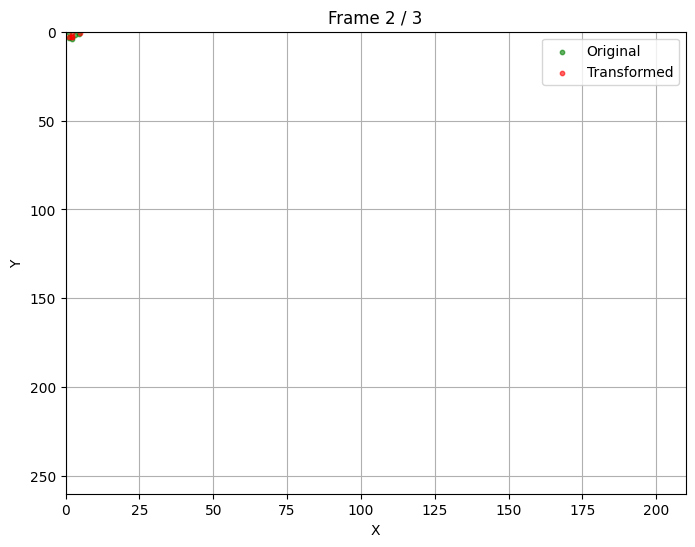

In [20]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlim(0, 210)
ax.set_ylim(260, 0)
ax.set_title("Keypoint comparisions")
ax.set_xlabel("X")
ax.set_ylabel("Y")
original_scatter = ax.scatter([],[], color='green', label='Original', alpha=0.6, s=10)
transformed_scatter = ax.scatter([],[], color='red', label='Transformed', alpha=0.6, s=10)
ax.legend()
ax.grid(True)

def update(frame):
    original_scatter.set_offsets(np.column_stack((original_x[frame], original_y[frame])))
    transformed_scatter.set_offsets(np.column_stack((reconstructed_x[frame], reconstructed_y[frame])))
    ax.set_title(f"Frame {frame} / {original_x.shape[0]}")
    return original_scatter, transformed_scatter

ani = animation.FuncAnimation(fig, update, frames=original_x.shape[0], interval=5, blit=True)
ani.save(f"new_plot_{s}.gif", writer="pillow", fps=20)

In [21]:
original_x.shape

(3, 5)

In [22]:
import numpy as np
import pickle

In [23]:
orig_path = '/nas/Dataset/Phoenix/phoenix-2014-keypoints.pkl'
with open(orig_path, 'rb') as f:
    keypoints = pickle.load(f)

keypoints

{'fullFrame-210x260px/train/01April_2010_Thursday_heute_default-0/1/01April_2010_Thursday_heute': {'keypoints': array([[[109.4   ,  48.53  ,   0.9727],
          [118.    ,  41.22  ,   0.9795],
          [ 99.06  ,  43.    ,   0.985 ],
          ...,
          [101.44  , 243.4   ,   0.828 ],
          [106.6   , 245.8   ,   0.8804],
          [110.1   , 246.6   ,   0.8843]],
  
         [[108.6   ,  47.16  ,   0.966 ],
          [117.9   ,  40.2   ,   0.9604],
          [ 98.7   ,  41.8   ,   0.9736],
          ...,
          [103.    , 239.6   ,   0.842 ],
          [106.8   , 241.5   ,   0.8643],
          [109.25  , 242.2   ,   0.848 ]],
  
         [[108.    ,  46.28  ,   0.9556],
          [117.56  ,  39.7   ,   0.9785],
          [ 98.06  ,  40.66  ,   0.9683],
          ...,
          [ 99.    , 227.6   ,   0.7515],
          [102.1   , 230.5   ,   0.813 ],
          [104.06  , 231.9   ,   0.8125]],
  
         ...,
  
         [[101.75  ,  65.1   ,   0.935 ],
          [110.2  

In [24]:
sample = keypoints['fullFrame-210x260px/train/01April_2010_Thursday_heute_default-0/1/01April_2010_Thursday_heute']['keypoints']
sample = np.array(sample, dtype=np.float32)
sample.shape # (T, N, 3)

(176, 133, 3)

In [25]:
original_x = sample[..., 0]
original_y = sample[..., 1]
original_x.shape, original_y.shape

((176, 133), (176, 133))

In [26]:
s = 1/5
s

0.2

In [27]:
movement_vectors = np.array([
    (s, 0), (s, -s), (0, -s), (-s, -s), (-s, 0),
    (-s, s), (0, s), (s, s), (0, 0)
])
movement_vectors

array([[ 0.2,  0. ],
       [ 0.2, -0.2],
       [ 0. , -0.2],
       [-0.2, -0.2],
       [-0.2,  0. ],
       [-0.2,  0.2],
       [ 0. ,  0.2],
       [ 0.2,  0.2],
       [ 0. ,  0. ]])

In [28]:
first_frame = np.round(sample[0, :, :2] / s) * s
sample[0, :, :2], first_frame

(array([[109.375  ,  48.53125],
        [118.     ,  41.21875],
        [ 99.0625 ,  43.     ],
        [129.875  ,  49.1875 ],
        [ 88.0625 ,  53.625  ],
        [155.     , 115.125  ],
        [ 66.9375 , 118.375  ],
        [179.375  , 198.875  ],
        [ 42.71875, 206.875  ],
        [159.     , 218.125  ],
        [ 80.25   , 225.5    ],
        [145.5    , 245.5    ],
        [ 83.6875 , 246.625  ],
        [105.5625 ,  70.8125 ],
        [ 92.5    ,  56.625  ],
        [129.25   , 233.25   ],
        [ 88.     ,  41.46875],
        [128.5    , 231.625  ],
        [128.75   , 231.875  ],
        [118.4375 , 252.125  ],
        [101.0625 , 238.75   ],
        [101.1875 , 238.75   ],
        [118.625  , 253.     ],
        [ 88.4375 ,  47.84375],
        [ 89.0625 ,  53.5625 ],
        [ 89.625  ,  58.78125],
        [ 90.8125 ,  64.     ],
        [ 92.875  ,  69.125  ],
        [ 96.0625 ,  73.6875 ],
        [100.375  ,  77.25   ],
        [105.6875 ,  79.1875 ],
        

In [29]:
dx = np.diff(original_x, axis=0)
dy = np.diff(original_y, axis=0)
dx.shape, dy.shape, dx, dy

((175, 133),
 (175, 133),
 array([[-0.75     , -0.125    , -0.375    , ...,  1.5625   ,  0.1875   ,
         -0.875    ],
        [-0.625    , -0.3125   , -0.625    , ..., -4.       , -4.6875   ,
         -5.1875   ],
        [-0.9375   , -0.75     , -0.3125   , ...,  1.3125   ,  0.75     ,
          0.0625   ],
        ...,
        [-0.125    , -0.0625   , -0.1875   , ...,  1.4375   ,  1.4453125,
          1.5546875],
        [-0.1875   ,  0.0625   ,  0.0625   , ...,  0.703125 ,  0.890625 ,
          1.125    ],
        [ 0.       , -0.5625   , -0.0625   , ...,  1.1796875,  1.2734375,
          1.234375 ]], dtype=float32),
 array([[ -1.375  ,  -1.03125,  -1.1875 , ...,  -3.75   ,  -4.25   ,
          -4.375  ],
        [ -0.875  ,  -0.5    ,  -1.15625, ..., -12.     , -11.     ,
         -10.375  ],
        [ -0.71875,  -0.21875,  -0.90625, ..., -23.375  , -25.5    ,
         -26.5    ],
        ...,
        [  0.3125 ,   0.21875,  -0.0625 , ...,   0.625  ,   1.125  ,
           1.25 

In [30]:
quantized_dx = np.zeros_like(dx)
quantized_dy = np.zeros_like(dy)

num = []
num = [x for x in quantized_dy if x.any() != 0.]
num

[]

In [31]:
dx[:2,:5], dy[:2, :5]

(array([[-0.75  , -0.125 , -0.375 , -0.375 , -0.25  ],
        [-0.625 , -0.3125, -0.625 , -0.5   , -0.3125]], dtype=float32),
 array([[-1.375  , -1.03125, -1.1875 ,  0.65625,  0.     ],
        [-0.875  , -0.5    , -1.15625, -0.625  , -2.0625 ]], dtype=float32))

In [32]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

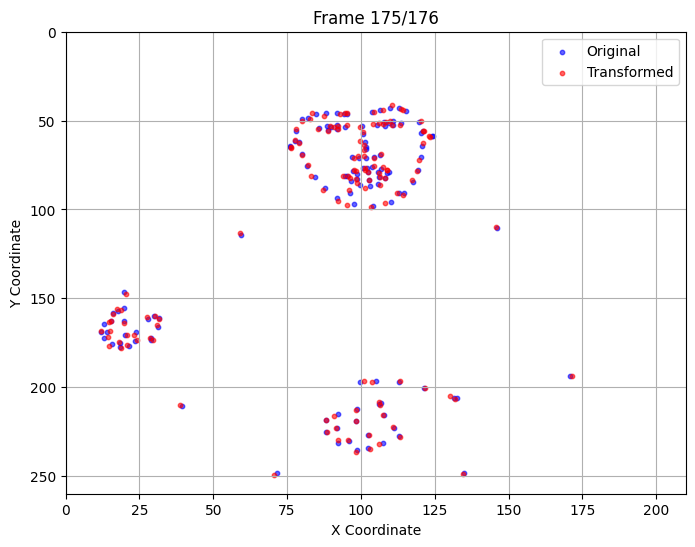

In [33]:
for i in range(175):
    for j in range(133):
        remaining_dx = dx[i, j]
        remaining_dy = dy[i, j]
        # print(remaining_dx, remaining_dy)
        while abs(remaining_dx) > s or abs(remaining_dy) > s:
            # print(f"remaining: {remaining_dx}, {remaining_dy}")
            diff = np.array([remaining_dx, remaining_dy])
            distances = np.linalg.norm(movement_vectors - diff, axis=1)
            # print(f"distances: {distances}")
            best_match = movement_vectors[np.argmin(distances)]
            # print(f"best_match: {best_match}"

            quantized_dx[i, j] += best_match[0]
            quantized_dy[i, j] += best_match[1]
            # print(f"quantized_dx: {quantized_dx[i, j]}")
            # print(f"quantized_dy: {quantized_dy[i, j]}")

            remaining_dx -= best_match[0]
            remaining_dy -= best_match[1]
            # print(f"remaining_dx: {remaining_dx}")
            # print(f"remaining_dy: {remaining_dy}")

        diff = np.array([remaining_dx, remaining_dy])
        distances = np.linalg.norm(movement_vectors - diff, axis=1)
        best_match = movement_vectors[np.argmin(distances)]
        quantized_dx[i, j] += best_match[0]
        quantized_dy[i, j] += best_match[1]

transformed_data = np.zeros((176, 133, 2), dtype=np.float32)
transformed_data[0] = first_frame
transformed_data[1:] = np.stack([quantized_dx, quantized_dy], axis=-1)

# 🔹 Reconstruct the transformed data (using only the 9 vectors for reconstruction)
for t in range(1, 176):
    transformed_data[t, :, 0] = transformed_data[t - 1, :, 0] + quantized_dx[t - 1]
    transformed_data[t, :, 1] = transformed_data[t - 1, :, 1] + quantized_dy[t - 1]

reconstructed_x = transformed_data[..., 0]
reconstructed_y = transformed_data[..., 1]

# 🔹 Set up the animation
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(0, 210)
ax.set_ylim(260, 0)  # Flip the y-axis because in the OpenPose coordinate system, (0,0) is top-left
ax.set_title("Keypoint Comparison Over Time (9-Vector with Split Large Motion)")
ax.set_xlabel("X Coordinate")
ax.set_ylabel("Y Coordinate")

# Create two scatter plots to visualize the original and transformed data
original_scatter = ax.scatter([], [], color='blue', label='Original', alpha=0.6, s=10)
transformed_scatter = ax.scatter([], [], color='red', label='Transformed', alpha=0.6, s=10)

ax.legend()
ax.grid(True)

# 🔹 Define the update function for the animation
def update(frame):
    original_scatter.set_offsets(np.column_stack((original_x[frame], original_y[frame])))
    transformed_scatter.set_offsets(np.column_stack((reconstructed_x[frame], reconstructed_y[frame])))
    ax.set_title(f"Frame {frame}/{original_x.shape[0]}")
    return original_scatter, transformed_scatter

# 🔹 Create the animation
ani = animation.FuncAnimation(fig, update, frames=original_x.shape[0], interval=50, blit=False)

# 🔹 Save the animation
ani.save("NEW_keypoint_comparison_9vectors_split.gif", writer="pillow", fps=20)
plt.show()



In [34]:
formatted = [float(f"{x:.2f}") for x in quantized_dx[0]]
print(sorted(formatted))

[-17.0, -17.0, -4.6, -3.4, -3.4, -3.2, -3.0, -2.8, -2.8, -1.4, -1.2, -1.2, -1.2, -1.2, -1.2, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.8, 0.8, 0.8, 0.8, 0.8, 1.2, 1.4, 1.6, 1.6, 1.8, 2.0, 2.0, 2.2, 2.2, 2.4, 2.4, 2.4, 2.4, 2.4, 2.6, 2.6, 2.8, 2.8, 2.8, 3.4, 18.0, 20.8]


In [35]:
sum(original_x) / len(original_x), sum(reconstructed_x) / len(reconstructed_x)
len([sum(x)/len(x) for x in original_x]), len([sum(x)/len(x) for x in reconstructed_x])

(176, 176)

In [36]:
elements = [x for x in original_x for x in x]
sum(elements) / len(elements)

103.75343549080442

In [37]:
re_el = [x for x in reconstructed_x for x in x]
sum(re_el) / len(re_el)

103.68244552131556

In [38]:
reconstructed_x.shape

(176, 133)

In [39]:
transformed_data

array([[[109.4      ,  48.600002 ],
        [118.       ,  41.2      ],
        [ 99.       ,  43.       ],
        ...,
        [101.4      , 243.40001  ],
        [106.6      , 245.8      ],
        [110.200005 , 246.6      ]],

       [[108.6      ,  47.2      ],
        [117.8      ,  40.2      ],
        [ 98.6      ,  41.8      ],
        ...,
        [103.       , 239.6      ],
        [106.799995 , 241.6      ],
        [109.4      , 242.20001  ]],

       [[108.       ,  46.4      ],
        [117.4      ,  39.8      ],
        [ 98.       ,  40.6      ],
        ...,
        [ 99.       , 227.6      ],
        [102.2      , 230.6      ],
        [104.200005 , 231.80002  ]],

       ...,

       [[101.40004  ,  64.00001  ],
        [109.00001  ,  51.00002  ],
        [ 90.79998  ,  53.40004  ],
        ...,
        [ 12.199919 , 169.59987  ],
        [ 12.7998905, 174.79984  ],
        [ 16.39991  , 176.39973  ]],

       [[101.20004  ,  64.00001  ],
        [109.00001  ,  51.2

In [40]:
quantized_dx

array([[-0.8      , -0.2      , -0.4      , ...,  1.6000001,  0.2      ,
        -0.8      ],
       [-0.6      , -0.4      , -0.6      , ..., -4.0000005, -4.6      ,
        -5.1999993],
       [-1.       , -0.8      , -0.4      , ...,  1.4000001,  0.8      ,
         0.       ],
       ...,
       [-0.2      ,  0.       , -0.2      , ...,  1.4000001,  1.4000001,
         1.6000001],
       [-0.2      ,  0.       ,  0.       , ...,  0.8      ,  0.8      ,
         1.2      ],
       [ 0.       , -0.6      ,  0.       , ...,  1.2      ,  1.2      ,
         1.2      ]], dtype=float32)

In [41]:
from graphviz import Digraph

dot = Digraph(comment='Absolute vs. Relative Coordinates')

# Nodes
dot.node('Kij', 'Absolute Coordinates\n(K_ij)')
dot.node('Q', 'Quantization\n(Delta-based Encoding)')
dot.node('Rij', 'Relative Coordinates\n(Relative(K_ij))')

dot.node('M1', 'Model_1\n(Trained on Absolute)')
dot.node('A1', 'Accuracy_1')

dot.node('M2', 'Model_2\n(Trained on Relative)')
dot.node('A2', 'Accuracy_2')

dot.node('M3', 'Model_3\n(Combined Approach)')

# Edges
dot.edge('Kij', 'M1', label='Train')
dot.edge('M1', 'A1', label='Evaluate')

dot.edge('Kij', 'Q', label='Delta-based')
dot.edge('Q', 'Rij', label='Generate Relative')

dot.edge('Rij', 'M2', label='Train')
dot.edge('M2', 'A2', label='Evaluate')

# Combination hypothesis: using both Model_1 and Model_2 (or their inputs) in some way
dot.edge('M1', 'M3', label='Combine')
dot.edge('M2', 'M3', label='Combine')

# Render the diagram (choose your preferred output format, e.g. 'png')
dot.render('diagram.gv', format='png', view=True)


'diagram.gv.png'

In [ ]:
sample

array([[[109.375     ,  48.53125   ,   0.97265625],
        [118.        ,  41.21875   ,   0.9794922 ],
        [ 99.0625    ,  43.        ,   0.9848633 ],
        ...,
        [101.4375    , 243.375     ,   0.828125  ],
        [106.625     , 245.75      ,   0.8803711 ],
        [110.125     , 246.625     ,   0.88427734]],

       [[108.625     ,  47.15625   ,   0.9658203 ],
        [117.875     ,  40.1875    ,   0.9604492 ],
        [ 98.6875    ,  41.8125    ,   0.9736328 ],
        ...,
        [103.        , 239.625     ,   0.8417969 ],
        [106.8125    , 241.5       ,   0.8642578 ],
        [109.25      , 242.25      ,   0.84814453]],

       [[108.        ,  46.28125   ,   0.9555664 ],
        [117.5625    ,  39.6875    ,   0.9785156 ],
        [ 98.0625    ,  40.65625   ,   0.9682617 ],
        ...,
        [ 99.        , 227.625     ,   0.75146484],
        [102.125     , 230.5       ,   0.8129883 ],
        [104.0625    , 231.875     ,   0.8125    ]],

       ...,

      

Error: no "view" rule for type "image/png" passed its test case
       (for more information, add "--debug=1" on the command line)


In [43]:
import lovely_tensors as lt

In [44]:
lt.monkey_patch()

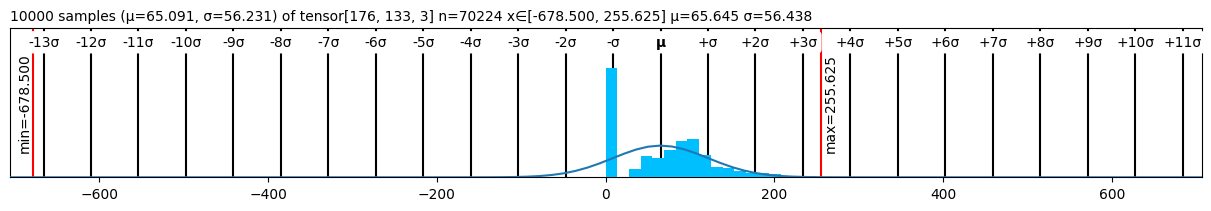

In [47]:
import torch

sample_tensor = torch.from_numpy(sample)
sample_tensor.plt

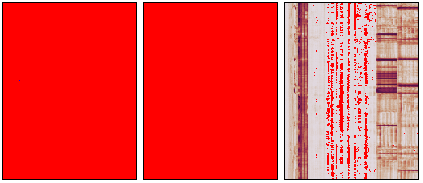

In [51]:
sample_tensor.permute(2,0,1).chans

atan2 for x = -1, y = -1 -135.0
atan,for x = -1, y = -1 45.0


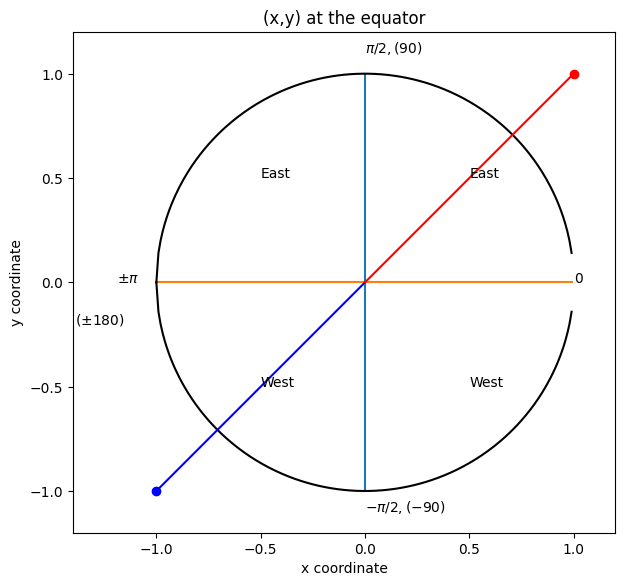

In [52]:
import matplotlib.pyplot as plt
import numpy as np

r2d = 180/np.pi
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)
x = np.arange(-1,1.,0.01)
y = np.arange(1,-1.,-0.01)

ycirc = np.sqrt(1 - x**2)
x1 = -1
y1 = -1
print('atan2 for x = -1, y = -1',np.arctan2(y1,x1)*r2d)
print('atan,for x = -1, y = -1',np.arctan(y1/x1)*r2d)

ax.plot(np.zeros(y.shape),y)
ax.plot(x, np.zeros(x.shape))
ax.plot(x, ycirc,'black')
ax.plot(x, -ycirc,'black')
ax.plot([0, -1], [0,-1],color='blue')
ax.plot([0, 1], [0,1],color='red')
ax.plot(1,1,marker='o',color='red')
ax.plot(-1,-1,marker='o',color='blue')

ax.set_aspect('equal')
ax.set_ylim([-1.2, 1.2])
ax.set_xlim([-1.4, 1.2])
ax.text(1,0,'0')
ax.text(0,1.1,'$\pi/2, (90)$')
ax.text(-1.19,0,'$\pm\pi$')
ax.text(-1.39,-0.2,'($\pm180$)')
ax.text(0,-1.1,'$-\pi/2, (-90)$')
ax.text(0.5,0.5,'East')
ax.text(-0.5,0.5,'East')
ax.text(0.5,-0.5,'West')
ax.text(-0.5,-0.5,'West')
ax.set_xlabel('x coordinate')
ax.set_ylabel('y coordinate')
ax.set_title('(x,y) at the equator')
plt.show()

In [53]:
import math

In [61]:
math.degrees(math.atan2(-1,1))

-45.0

In [ ]:
subject

Main activities

09:50~10:00

orientation

Program schedule information

note

Japmoa Co., Ltd.

Day 1 (5 hours)

10:00~12:00

Special lecture on employment

Employment competency strengthening training

Professional instructor

12:00~13:00

13:00~16:00

16:00~16:10

meal

lunch

Special lecture on employment

Employment competency strengthening training

Japmoa Co., Ltd.

Professional instructor

finish

Closing and satisfaction survey

Japmoa Co., Ltd.